In [11]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

In [12]:
train_path = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/'
test_path = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/'

In [13]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(128,128))

## Shape images

In [14]:
image_shape = img_to_array(img)

## Number of class

In [15]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [16]:
batch_size = 32

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=image_shape.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = image_shape.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = image_shape.shape[:2],
                                                  batch_size = batch_size,
                                                  color_mode= "rgb",
                                                  class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [19]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam", #rmsprop
             metrics = ["accuracy"])

In [20]:
early = EarlyStopping(monitor='val_loss',patience=5)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, mil_lr=0.001)

In [21]:
hist = model.fit_generator(generator = train_generator,
                           steps_per_epoch = 1600 // batch_size,
                           epochs = 50,
                           validation_data = test_generator,
                           validation_steps = 800 // batch_size,
                           callbacks=[early, reduce])

Epoch 1/50
50/50 [==============================] - 23s 374ms/step - loss: 4.8443 - accuracy: 0.0259 - val_loss: 4.2092 - val_accuracy: 0.0575
Epoch 2/50
50/50 [==============================] - 18s 365ms/step - loss: 4.1290 - accuracy: 0.0663 - val_loss: 3.2753 - val_accuracy: 0.1875
Epoch 3/50
50/50 [==============================] - 18s 362ms/step - loss: 3.3576 - accuracy: 0.1627 - val_loss: 2.6209 - val_accuracy: 0.2975
Epoch 4/50
50/50 [==============================] - 18s 364ms/step - loss: 2.7251 - accuracy: 0.2650 - val_loss: 1.9336 - val_accuracy: 0.4762
Epoch 5/50
50/50 [==============================] - 18s 356ms/step - loss: 2.1456 - accuracy: 0.3951 - val_loss: 1.5958 - val_accuracy: 0.5850
Epoch 6/50
50/50 [==============================] - 18s 355ms/step - loss: 1.8218 - accuracy: 0.4841 - val_loss: 1.2439 - val_accuracy: 0.6525
Epoch 7/50
50/50 [==============================] - 17s 339ms/step - loss: 1.4446 - accuracy: 0.5644 - val_loss: 0.9615 - val_accuracy: 0.7450

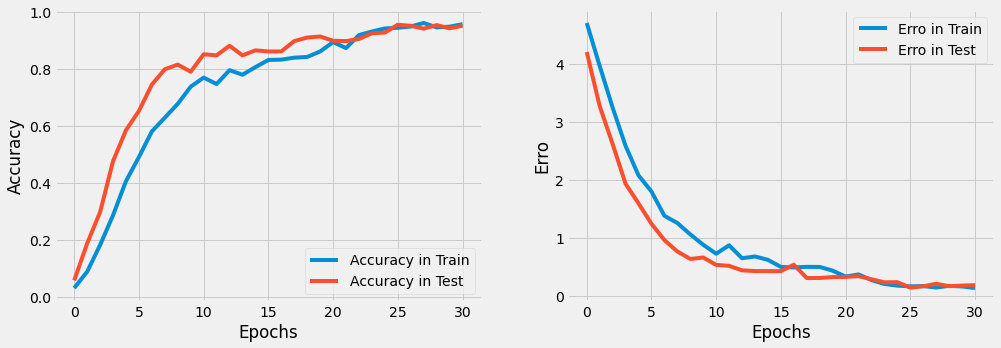

In [22]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','Accuracy in Test'])
axes[0].grid(True)

axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Erro')
axes[1].legend(['Erro in Train','Erro in Test'])
axes[1].grid(True)

In [36]:
pip install watermark


Note: you may need to restart the kernel to use updated packages.


In [37]:
%load_ext watermark
%watermark -a "Sri Hari Sai P 21BAI1143"-u -d -m -v

Author: Sri Hari Sai P 21BAI1143

Last updated: 2024-02-07

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.22.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.15.133+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

